<a href="https://www.kaggle.com/heyrobin/birds-eda?scriptVersionId=88105698" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<img src="https://github.com/heyrobin/Birds-identify-eda/blob/main/banner.jpg?raw=true">

# Introduction

hello, welcome to my notebook. I am so much into nature, space and animals. There it is an awesome competitions about birds.🐦<br>

I am very new to audio analysis, but I have to start from somewhere. Let's enjoy and learn. I am following <a href="https://www.kaggle.com/robikscube ">Rob Mulla's</a> walkthrough for starter 🦤.

If you like my notebook, do show some love 🥺.

In [1]:
#Data
import numpy as np
import pandas as pd

#vizuals
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

import librosa
import librosa.display
import IPython.display as ipd

In [2]:
!ls -GFlash --color ../input/birdclef-2022/

total 5.1M
   0 drwxr-xr-x   4 nobody    0 Feb 13 16:25 ./
4.0K drwxr-xr-x   3 root   4.0K Feb 17 18:45 ../
2.0M -rw-r--r--   1 nobody 2.0M Feb 13 16:25 eBird_Taxonomy_v2021.csv
4.0K -rw-r--r--   1 nobody  127 Feb 13 16:25 sample_submission.csv
4.0K -rw-r--r--   1 nobody  208 Feb 13 16:25 scored_birds.json
4.0K -rw-r--r--   1 nobody  219 Feb 13 16:25 test.csv
   0 drwxr-xr-x   2 nobody    0 Feb 13 16:25 test_soundscapes/
   0 drwxr-xr-x 154 nobody    0 Feb 13 16:25 train_audio/
3.2M -rw-r--r--   1 nobody 3.2M Feb 13 16:25 train_metadata.csv


In [3]:
link = "../input/birdclef-2022"
train = pd.read_csv(link + '/train_metadata.csv')
train.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,time,url,filename
0,afrsil1,[],"['call', 'flight call']",12.3910,-1.4930,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,2.5,08:00,https://www.xeno-canto.org/125458,afrsil1/XC125458.ogg
1,afrsil1,"['houspa', 'redava', 'zebdov']",['call'],19.8801,-155.7254,Euodice cantans,African Silverbill,Dan Lane,Creative Commons Attribution-NonCommercial-Sha...,3.5,08:30,https://www.xeno-canto.org/175522,afrsil1/XC175522.ogg
2,afrsil1,[],"['call', 'song']",16.2901,-16.0321,Euodice cantans,African Silverbill,Bram Piot,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:30,https://www.xeno-canto.org/177993,afrsil1/XC177993.ogg
3,afrsil1,[],"['alarm call', 'call']",17.0922,54.2958,Euodice cantans,African Silverbill,Oscar Campbell,Creative Commons Attribution-NonCommercial-Sha...,4.0,11:00,https://www.xeno-canto.org/205893,afrsil1/XC205893.ogg
4,afrsil1,[],['flight call'],21.4581,-157.7252,Euodice cantans,African Silverbill,Ross Gallardy,Creative Commons Attribution-NonCommercial-Sha...,3.0,16:30,https://www.xeno-canto.org/207431,afrsil1/XC207431.ogg


## <span style="color:#AC4643"> SPECIES 🦤</span>

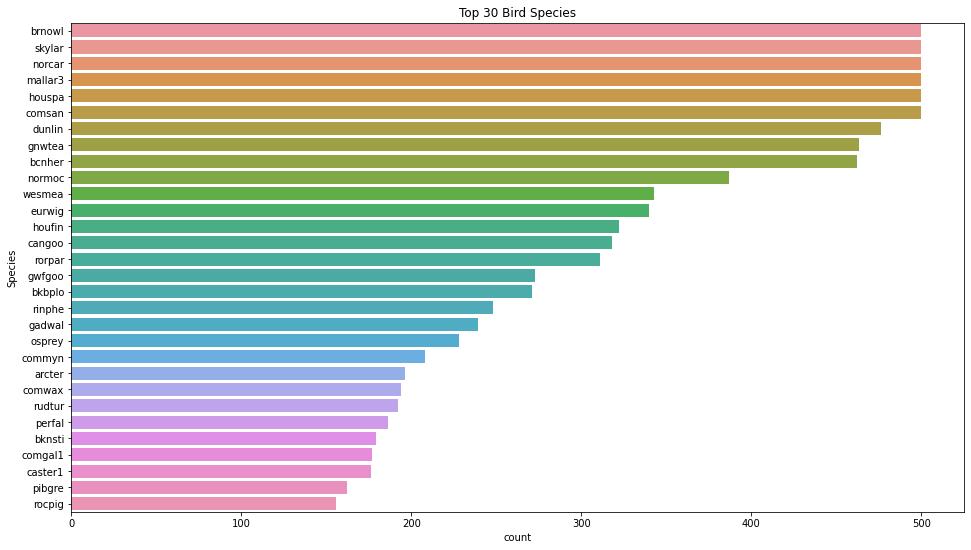

In [4]:
plt.figure(figsize=(16,9))
sns.countplot(y=train["primary_label"],
             order=train["primary_label"].value_counts().iloc[:30].index)

#plt.xticks(rotation=90)
plt.title('Top 30 Bird Species')
plt.ylabel("Species");

In [5]:
train["primary_label"].unique()

array(['afrsil1', 'akekee', 'akepa1', 'akiapo', 'akikik', 'amewig',
       'aniani', 'apapan', 'arcter', 'barpet', 'bcnher', 'belkin1',
       'bkbplo', 'bknsti', 'bkwpet', 'blkfra', 'blknod', 'bongul',
       'brant', 'brnboo', 'brnnod', 'brnowl', 'brtcur', 'bubsan',
       'buffle', 'bulpet', 'burpar', 'buwtea', 'cacgoo1', 'calqua',
       'cangoo', 'canvas', 'caster1', 'categr', 'chbsan', 'chemun',
       'chukar', 'cintea', 'comgal1', 'commyn', 'compea', 'comsan',
       'comwax', 'coopet', 'crehon', 'dunlin', 'elepai', 'ercfra',
       'eurwig', 'fragul', 'gadwal', 'gamqua', 'glwgul', 'gnwtea',
       'golphe', 'grbher3', 'grefri', 'gresca', 'gryfra', 'gwfgoo',
       'hawama', 'hawcoo', 'hawcre', 'hawgoo', 'hawhaw', 'hawpet1',
       'hoomer', 'houfin', 'houspa', 'hudgod', 'iiwi', 'incter1',
       'jabwar', 'japqua', 'kalphe', 'kauama', 'laugul', 'layalb',
       'lcspet', 'leasan', 'leater1', 'lessca', 'lesyel', 'lobdow',
       'lotjae', 'madpet', 'magpet1', 'mallar3', 'masboo

## <span style="color:#AC4643"> LOCATION ⛩️</span>

In [6]:
fig = px.scatter_geo(
    train,
    lat="latitude",
    lon="longitude",
    color="common_name",
    width=1_000,
    height=500,
    title="Birds Species",
)
fig.show()

<blockquote><p>📌<strong>Note</strong>:</p>
<ul>
    <li> Most of species are residing in <code>north america</code>, <code>south america</code> and <code>europe</code>.</li>
    <li> There are total <code>152</code> bird species.</li>
</ul>

## <span style="color:#AC4643"> COMMON NAMES 🦚</span>

In [7]:
train["common_name"].unique()

array(['African Silverbill', 'Akekee', 'Hawaii Akepa', 'Akiapolaau',
       'Akikiki', 'American Wigeon', 'Anianiau', 'Apapane', 'Arctic Tern',
       'Band-rumped Storm-Petrel', 'Black-crowned Night-Heron',
       'Belted Kingfisher', 'Black-bellied Plover', 'Black-necked Stilt',
       'Black-winged Petrel', 'Black Francolin', 'Black Noddy',
       "Bonaparte's Gull", 'Brant', 'Brown Booby', 'Brown Noddy',
       'Barn Owl', 'Bristle-thighed Curlew', 'Buff-breasted Sandpiper',
       'Bufflehead', "Bulwer's Petrel", 'Burrowing Parakeet',
       'Blue-winged Teal', 'Cackling Goose', 'California Quail',
       'Canada Goose', 'Canvasback', 'Caspian Tern', 'Cattle Egret',
       'Chestnut-bellied Sandgrouse', 'Chestnut Munia', 'Chukar',
       'Cinnamon Teal', 'Common Gallinule', 'Common Myna',
       'Indian Peafowl', 'Common Sandpiper', 'Common Waxbill',
       "Cook's Petrel", 'Akohekohe', 'Dunlin', 'Hawaii Elepaio',
       "Erckel's Francolin", 'Eurasian Wigeon', "Franklin's Gull",


## <span style="color:#AC4643"> RECORDINGS 🎶</span>

In [8]:
#Example
data = train["filename"].values[0]
all = link+'/train_audio/'+data

print('This is the sample example of Bird Recording')

ipd.Audio(all)

This is the sample example of Bird Recording


In [9]:
# function
def bird(num,name):
    loca = train[train['common_name'] == name]["filename"].values[num]
    all = link+'/train_audio/'+loca
    return ipd.Audio(all)

bird(2,"Japanese Bush Warbler")

# <center> <span style="color:#AC4643"> WORK IN PROGRESS 🕊️</span></center>